# Distributional Regression Network Verification

Verification of probabilistic MLPP outputs.

Only supports single Gaussian distribution for now.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import datetime
import numpy as np
from scipy.stats import norm
import pandas as pd
import xarray as xr
import properscoring as ps
from dt_output import get_dt_output
import tarfile

from verif.obs.utils import get_obs_serie
from verif.models.verif import VerifModelStation
from verif.models.mlpp_verif  import VerifMLPP

import s3fs
fs_s3 = s3fs.S3FileSystem()

# Prediction output

Preds are created by run, station

In [2]:
run_date = '2023060800'
station = '93439'
preds_path = 's3://metservice-research-us-west-2/research/experiments/benv/mlpp/predictions/nz4kmN-ECMWF-SIGMA'

pred_file = f'{preds_path}/{run_date}/{station}.parquet'
pred_station = pd.read_parquet(pred_file)
pred_station

,base_time,forecast_time,t2mc,sfp,uuu10m,vvv10m,mgust,prognosis_hour,p1_TTTTT,p2_TTTTT
0,2023-06-08 00:00:00+00:00,2023-06-08 00:00:00+00:00,11.963043,1022.094482,-3.690347,2.563072,9.116546,0.0,13.255820,1.469474
1,2023-06-08 00:00:00+00:00,2023-06-08 01:00:00+00:00,13.416229,1020.876892,-1.802328,2.982963,11.975831,1.0,14.261002,1.820397
2,2023-06-08 00:00:00+00:00,2023-06-08 02:00:00+00:00,13.858734,1020.635010,-2.692804,2.904781,9.399538,2.0,14.944288,1.691316
3,2023-06-08 00:00:00+00:00,2023-06-08 03:00:00+00:00,13.839111,1020.387573,-2.784375,1.177844,10.305304,3.0,14.616280,1.754899
4,2023-06-08 00:00:00+00:00,2023-06-08 04:00:00+00:00,13.354126,1019.981445,-2.348982,0.901619,9.573707,4.0,13.660922,1.775467
...,...,...,...,...,...,...,...,...,...,...
80,2023-06-08 00:00:00+00:00,2023-06-11 08:00:00+00:00,8.774719,1012.789185,0.770855,-0.038909,2.093821,80.0,8.868190,2.127773
81,2023-06-08 00:00:00+00:00,2023-06-11 09:00:00+00:00,8.297607,1013.013672,0.657593,-0.445387,2.108055,81.0,7.948636,2.192642
82,2023-06-08 00:00:00+00:00,2023-06-11 10:00:00+00:00,7.934753,1013.143494,-0.122592,-1.174483,3.429193,82.0,7.544794,2.301087
83,2023-06-08 00:00:00+00:00,2023-06-11 11:00:00+00:00,7.356171,1012.970520,0.633135,-1.787049,4.342745,83.0,7.125809,2.332872


In [3]:
verif = VerifMLPP(station_id='93439',
                 obs_source='DDB_obs',
                 model='MLPP',
                 model_vars=['TTTTT'],
                 preds_ds=pred_station,
                 freq='hourly')
verif.verify_vars()


,base_time,t2mc,sfp,uuu10m,vvv10m,mgust,prognosis_hour,p1_TTTTT,p2_TTTTT,TTTTT_obs,TTTTT_error,TTTTT_abs_error,TTTTT_error2,TTTTT_p_obs,TTTTT_cp_obs,TTTTT_negloglik,TTTTT_crps
forecast_time,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00+00:00,2023-06-08 00:00:00+00:00,11.963043,1022.094482,-3.690347,2.563072,9.116546,0.0,13.255820,1.469474,13.1,0.155820,0.155820,0.024280,0.269964,0.269964,1.309465,0.349994
2023-06-08 01:00:00+00:00,2023-06-08 00:00:00+00:00,13.416229,1020.876892,-1.802328,2.982963,11.975831,1.0,14.261002,1.820397,13.3,0.961002,0.961002,0.923524,0.190646,0.190646,1.657336,0.623237
2023-06-08 02:00:00+00:00,2023-06-08 00:00:00+00:00,13.858734,1020.635010,-2.692804,2.904781,9.399538,2.0,14.944288,1.691316,13.3,1.644288,1.644288,2.703684,0.147044,0.147044,1.917027,0.987133
2023-06-08 03:00:00+00:00,2023-06-08 00:00:00+00:00,13.839111,1020.387573,-2.784375,1.177844,10.305304,3.0,14.616280,1.754899,13.2,1.416280,1.416280,2.005848,0.164144,0.164144,1.807009,0.842875
2023-06-08 04:00:00+00:00,2023-06-08 00:00:00+00:00,13.354126,1019.981445,-2.348982,0.901619,9.573707,4.0,13.660922,1.775467,12.9,0.760922,0.760922,0.579002,0.204980,0.204980,1.584841,0.543062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-11 08:00:00+00:00,2023-06-08 00:00:00+00:00,8.774719,1012.789185,0.770855,-0.038909,2.093821,80.0,8.868190,2.127773,10.5,-1.631810,1.631810,2.662804,0.139723,0.139723,1.968090,0.973404
2023-06-11 09:00:00+00:00,2023-06-08 00:00:00+00:00,8.297607,1013.013672,0.657593,-0.445387,2.108055,81.0,7.948636,2.192642,10.3,-2.351364,2.351364,5.528915,0.102381,0.102381,2.279054,1.432009
2023-06-11 10:00:00+00:00,2023-06-08 00:00:00+00:00,7.934753,1013.143494,-0.122592,-1.174483,3.429193,82.0,7.544794,2.301087,10.6,-3.055206,3.055206,9.334283,0.071809,0.071809,2.633744,1.954433


<Axes: xlabel='forecast_time'>

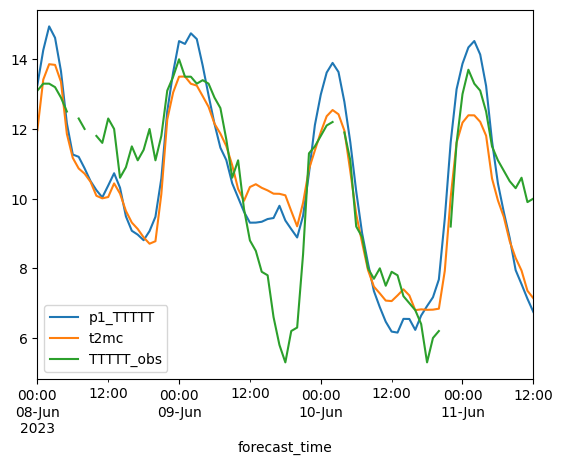

In [80]:
verif.verif_ds[['p1_TTTTT','t2mc', 'TTTTT_obs']].plot()